# Visualize the results of mapping a mixed RNA-seq sample against bacteria and phage. 

1. What fraction/percent of the sample mapped to each reference genome?
2. What locations of the phage reference genomes had the greatest read coverage?

In [11]:
library(readr)
library(dplyr, warn.conflicts = F)
library(ggplot2)

In [2]:
setwd("..")

In [3]:
reference_df <- data.frame(reference = c("NC_000964.3", "NZ_CP014269.1", "NC_000866.4", "NC_011421.1"),
                           name = c("B. subtilis", "E. coli", "T4 phage", "SPO1 phage"), 
                           class = c("Bacteria", "Bacteria", "Phage", "Phage"))

In [12]:
idxstats <- read_tsv("outputs/bwa_align/J1.idxstats", col_names = c("reference", "length", "num_mapped", "num_unmapped"), show_col_types = F) %>%
  left_join(reference_df, by = "reference") %>%
  mutate(total_reads = sum(num_mapped, num_unmapped),
         percent_mapped = (num_mapped/total_reads)*100)

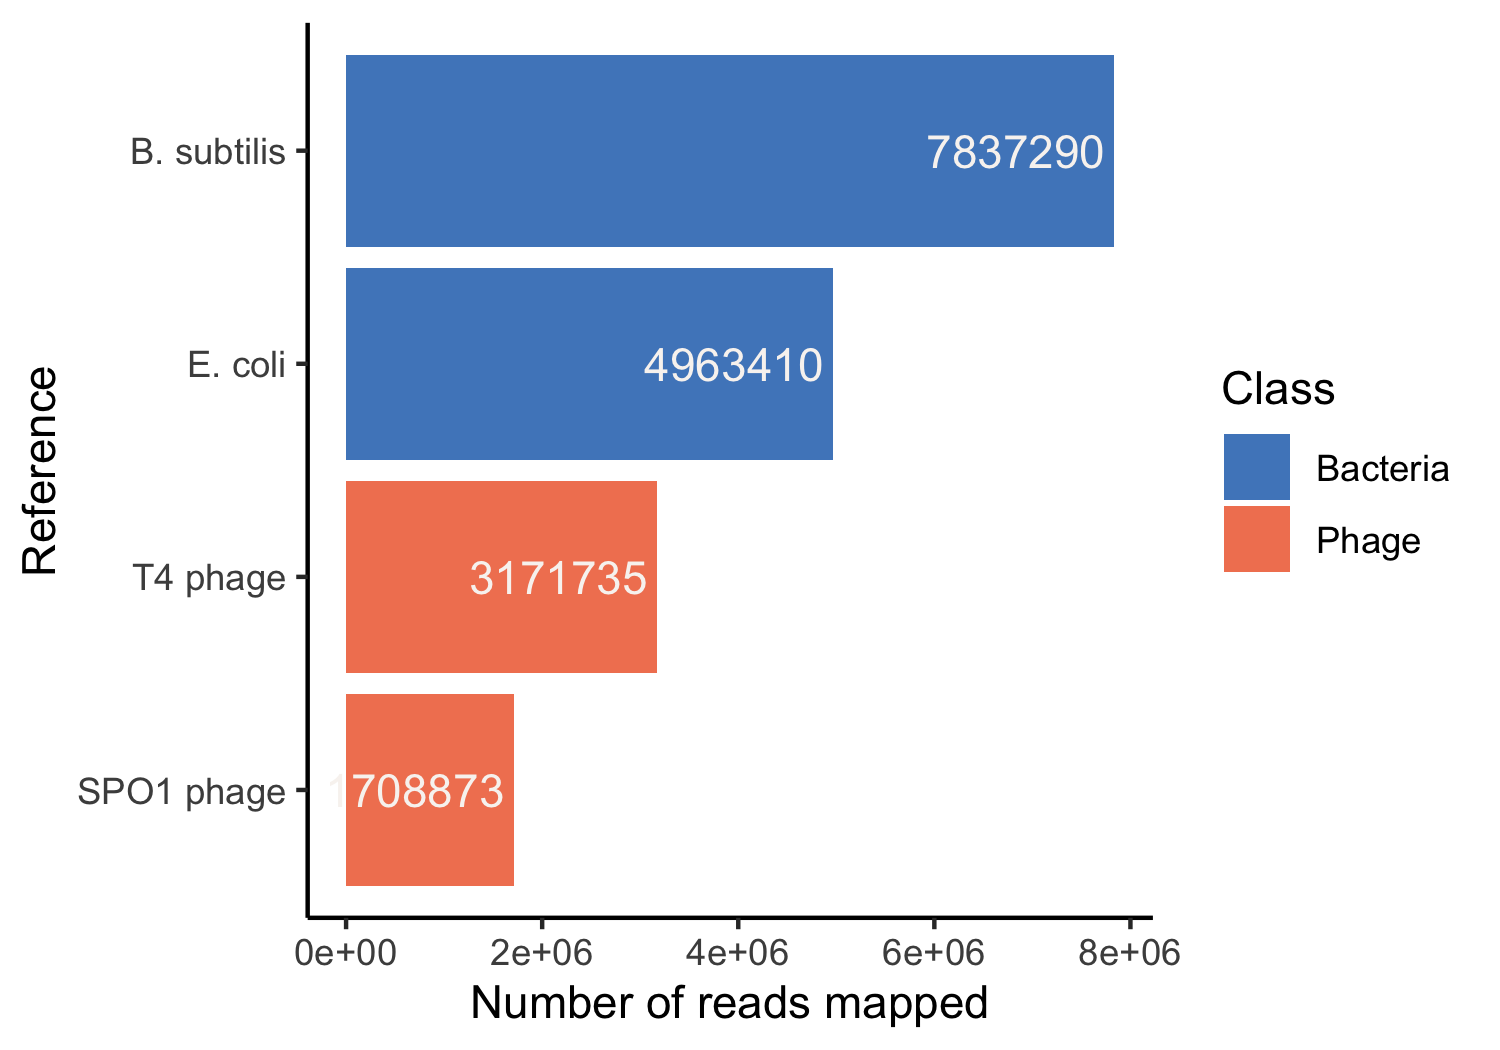

In [27]:
options(repr.plot.width = 5, repr.plot.height = 3.5, repr.plot.res = 300)

# number of reads mapped
ggplot(idxstats %>% filter(!is.na(name)), 
      aes(x = reorder(name, num_mapped), y = num_mapped, fill = class)) +
  geom_col() +
  geom_text(aes(label = num_mapped), hjust = 1.05, colour = "#F8F4F1") +
  theme_classic() +
  coord_flip() +
  labs(y = "Number of reads mapped", fill = "Class", x = "Reference") +
  scale_fill_manual(values = c("#5088C5", "#F28360"),
                    labels = c("Bacteria", "Phage"))

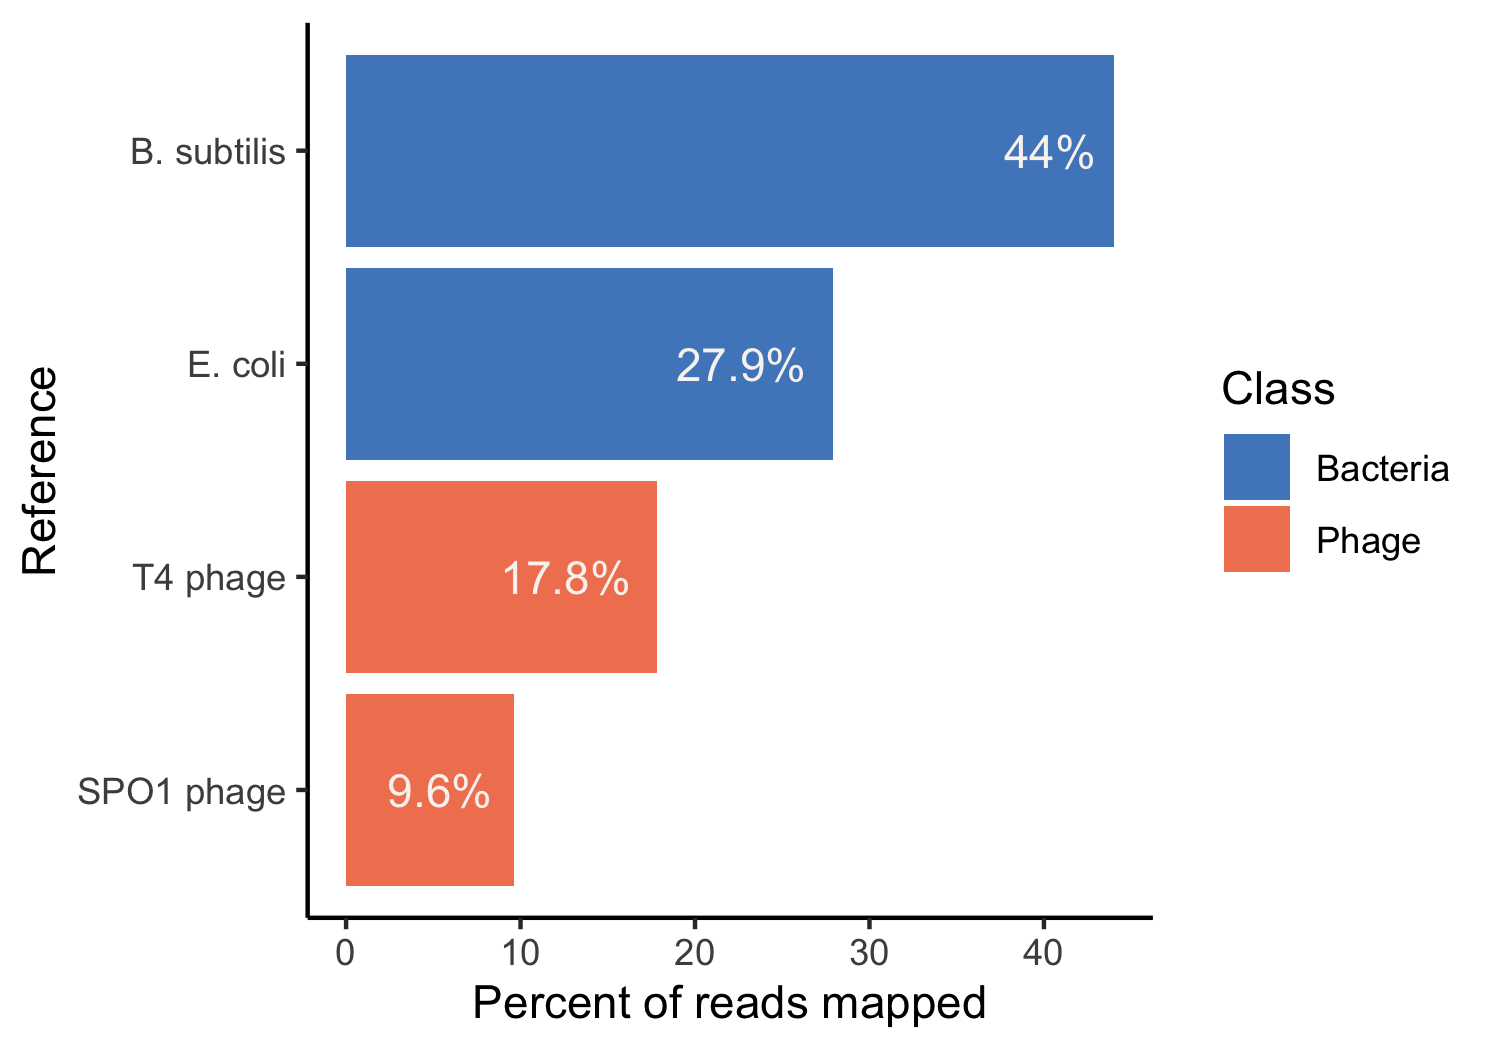

In [28]:
# percent of reads
ggplot(idxstats %>% filter(!is.na(name)), 
       aes(x = reorder(name, percent_mapped), y = percent_mapped, fill = class)) +
  geom_col() +
  geom_text(aes(label = paste0(round(percent_mapped, digits = 1), "%")), hjust = 1.2, colour = "#F8F4F1") +
  theme_classic() +
  coord_flip() +
  labs(y = "Percent of reads mapped", fill = "Class", x = "Reference") +
  scale_fill_manual(values = c("#5088C5", "#F28360"),
                    labels = c("Bacteria", "Phage"))

## Depth plots

In [7]:
depth <- read_tsv("outputs/bwa_align/J1.depth", col_names = c("reference", "position", "depth"), show_col_types = F) %>%
  left_join(reference_df, by = "reference") %>%
  filter(class %in% "phage")

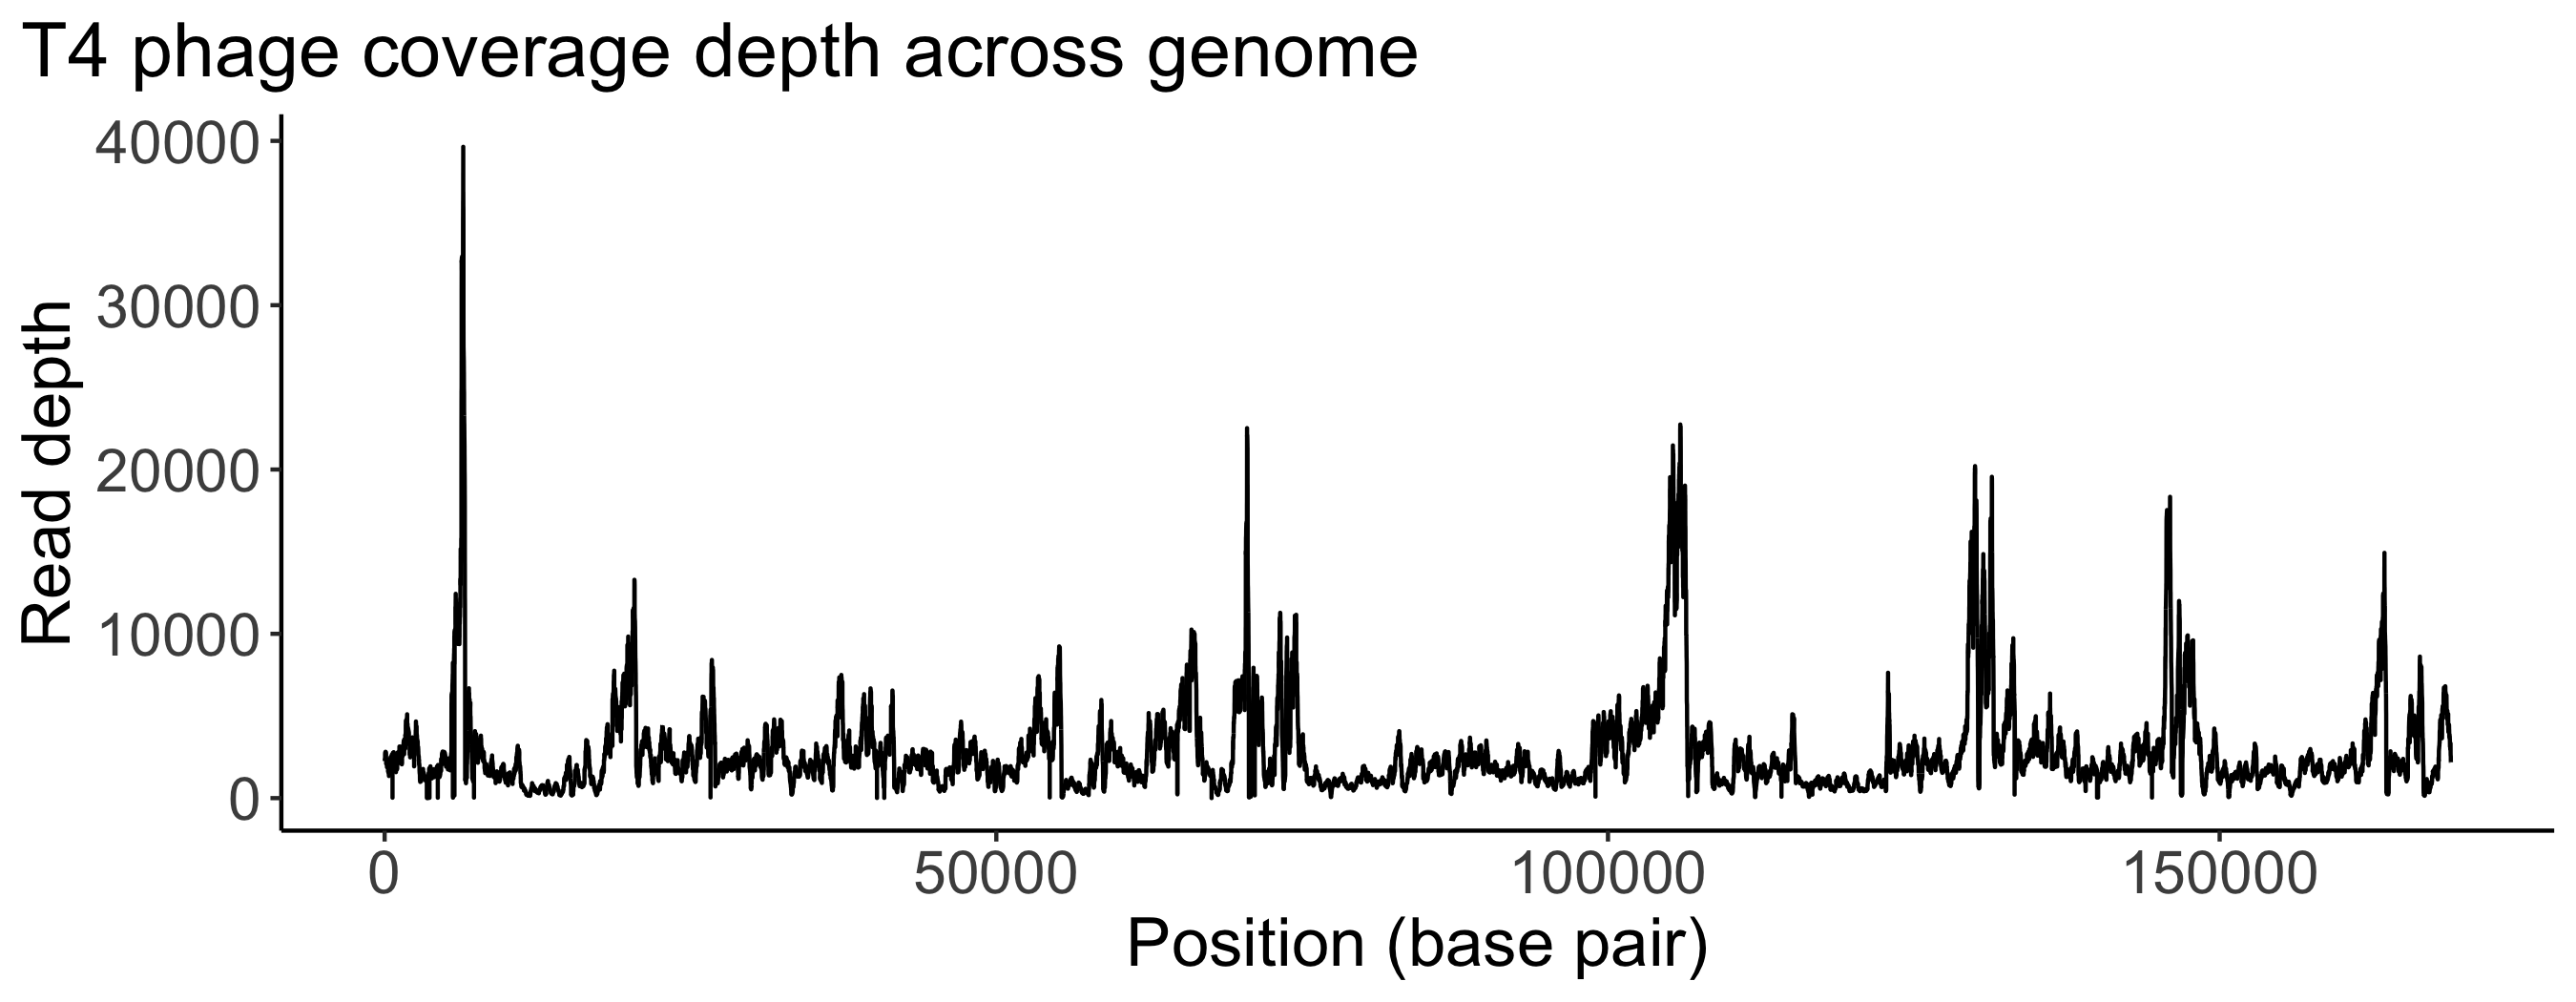

In [25]:
options(repr.plot.width = 9, repr.plot.height = 3.5, repr.plot.res = 300)
ggplot(depth %>% filter(name %in% c("T4 phage")),
       aes(x = position, y = depth)) +
  #geom_point(size = 0.5, alpha = .25) +
  geom_line() +
  theme_classic() +
  theme(plot.title.position = "plot",
        axis.text = element_text(size = 15),
        axis.title = element_text(size = 17),
        plot.title = element_text(size = 19)) +
  labs(title = "T4 phage coverage depth across genome",
       x = "Position (base pair)",
       y = "Read depth")

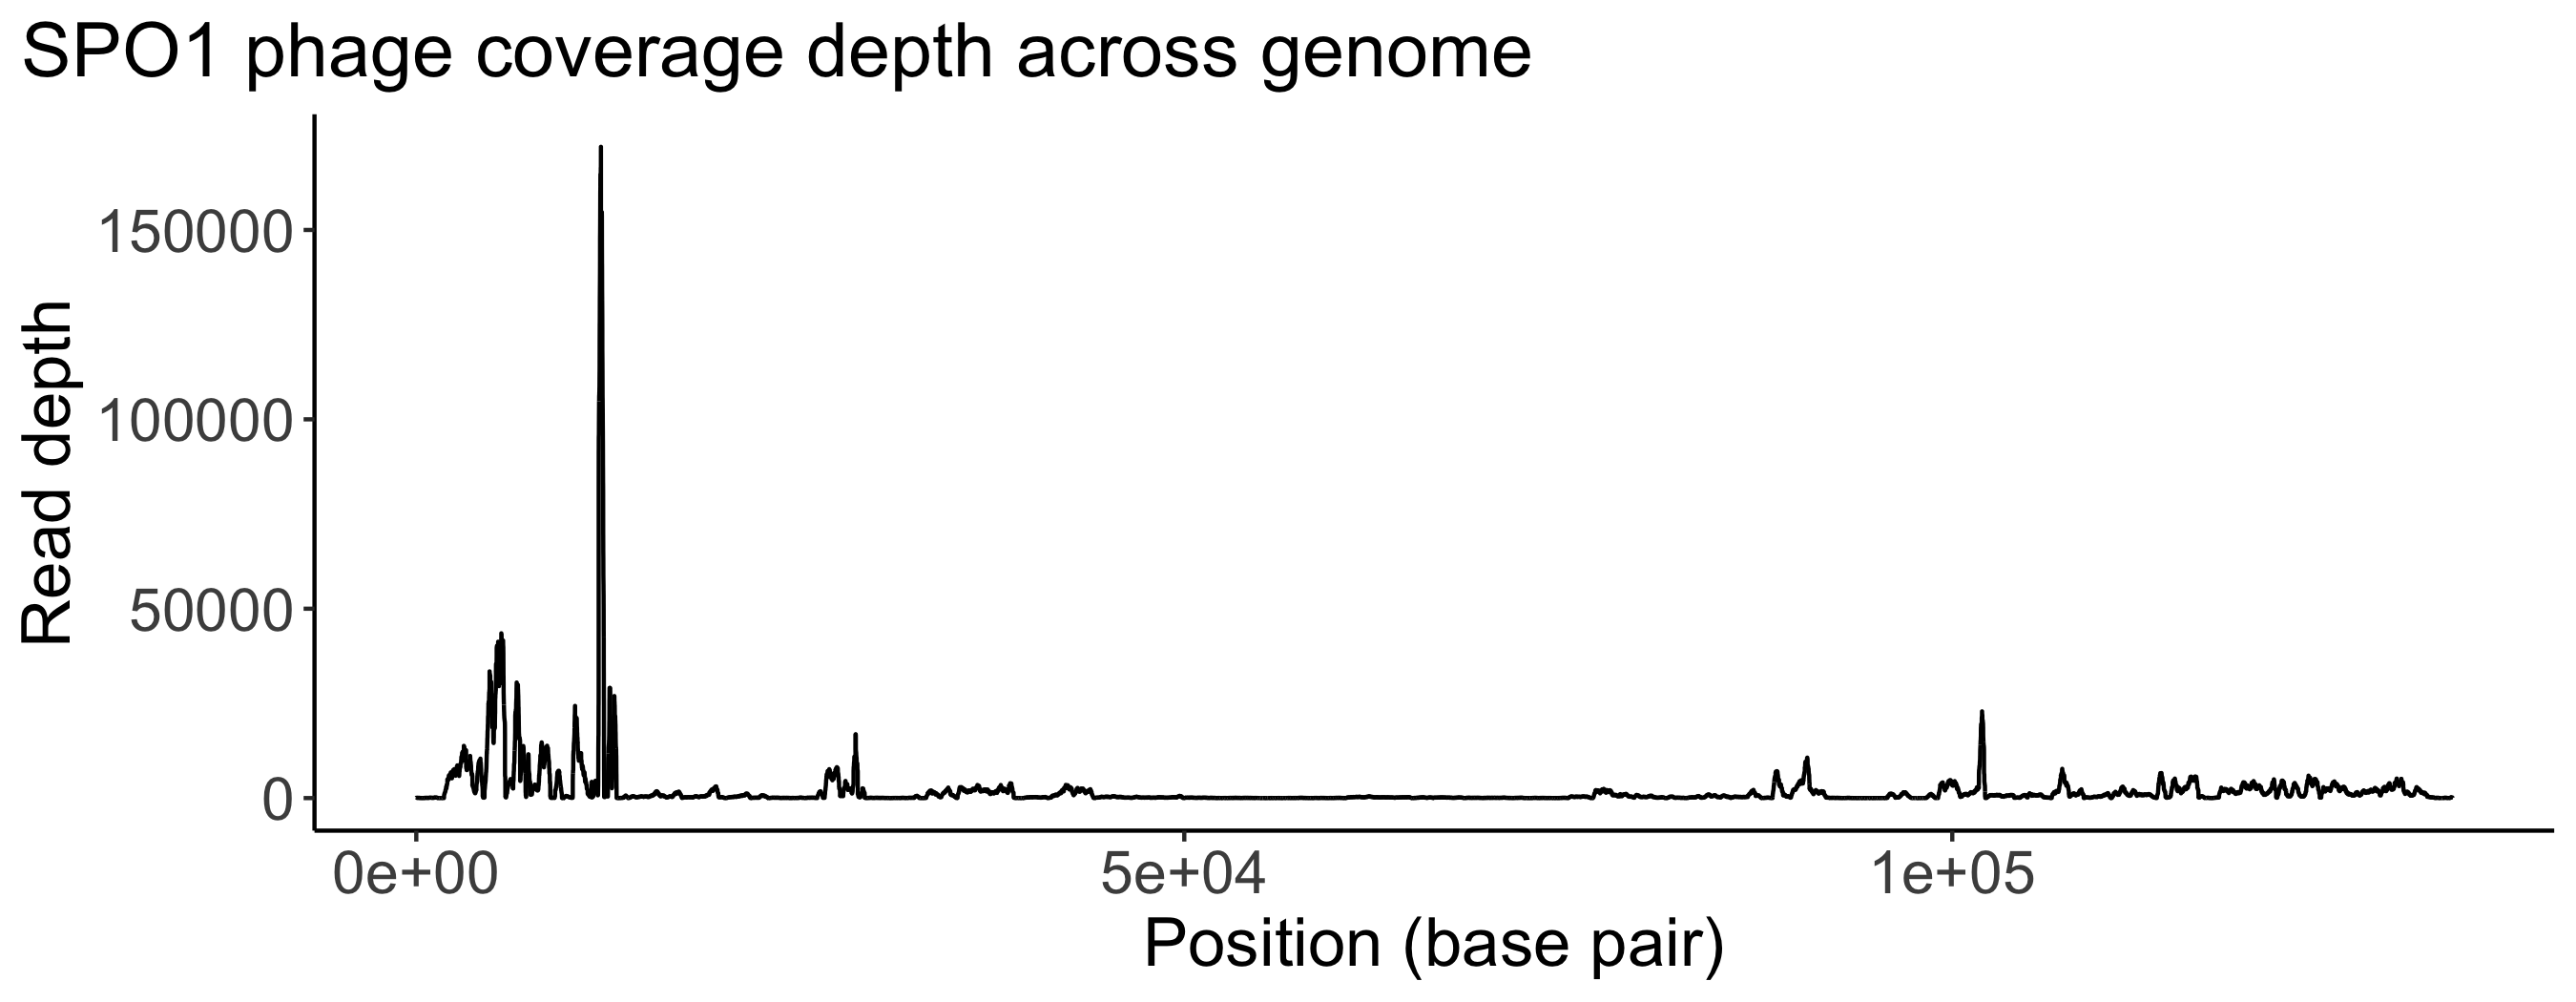

In [24]:
ggplot(depth %>% filter(name %in% c("SPO1 phage")),
       aes(x = position, y = depth)) +
  geom_line() +
  theme_classic() +
  theme(plot.title.position = "plot",
        axis.text = element_text(size = 15),
        axis.title = element_text(size = 17),
        plot.title = element_text(size = 19)) +
  labs(title = "SPO1 phage coverage depth across genome",
       x = "Position (base pair)",
       y = "Read depth")

## Software & versions

In [29]:
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Big Sur/Monterey 10.16

Matrix products: default
BLAS/LAPACK: /Users/taylorreiter/miniconda3/envs/pltenv/lib/libopenblasp-r0.3.21.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggplot2_3.4.0 dplyr_1.0.10  readr_2.1.3  

loaded via a namespace (and not attached):
 [1] pillar_1.8.1     compiler_4.1.3   base64enc_0.1-3  tools_4.1.3     
 [5] bit_4.0.5        digest_0.6.31    uuid_1.1-0       jsonlite_1.8.4  
 [9] evaluate_0.20    lifecycle_1.0.3  tibble_3.1.8     gtable_0.3.1    
[13] pkgconfig_2.0.3  rlang_1.0.6      IRdisplay_1.1    cli_3.6.0       
[17] parallel_4.1.3   IRkernel_1.3.1   fastmap_1.1.0    repr_1.1.5      
[21] withr_2.5.0      generics_0.1.3   vctrs_0.5.2      hms_1.1.2       
[25] bit64_4.0.5      grid_4.1.3       ti